# machine_learning.ipynb



In [26]:

# 1. Importación de librerías

import os
import pandas as pd
import numpy as np


# Ignorar warnings (opcional)
import warnings
warnings.filterwarnings("ignore")



## 2. Carga de datos

En este apartado, definimos las rutas de los archivos `.xlsx` que contienen los distintos **X_train** y **X_test** (con outliers, sin outliers, normalizados, escalados, etc.), así como los vectores `y_train` y `y_test`. 


In [27]:

# 2. Carga de datos

# Ruta base a la carpeta processed
BASE_PATH = "/workspaces/ejercicio_regresion_lineal/data/processed"

# Archivos disponibles según tu carpeta
TRAIN_PATHS = [
    "X_train_con_outliers.xlsx",
    "X_train_sin_outliers.xlsx",
    "X_train_con_outliers_norm.xlsx",
    "X_train_sin_outliers_norm.xlsx",
    "X_train_con_outliers_scal.xlsx",
    "X_train_sin_outliers_scal.xlsx"
]

TEST_PATHS = [
    "X_test_con_outliers.xlsx",
    "X_test_sin_outliers.xlsx",
    "X_test_con_outliers_norm.xlsx",
    "X_test_sin_outliers_norm.xlsx",
    "X_test_con_outliers_scal.xlsx",
    "X_test_sin_outliers_scal.xlsx"
]

# Carga de datasets
TRAIN_DATASETS = [pd.read_excel(os.path.join(BASE_PATH, path)) for path in TRAIN_PATHS]
TEST_DATASETS = [pd.read_excel(os.path.join(BASE_PATH, path)) for path in TEST_PATHS]

# Carga de las variables objetivo
y_train = pd.read_excel(os.path.join(BASE_PATH, "y_train.xlsx")).iloc[:, 0]
y_test = pd.read_excel(os.path.join(BASE_PATH, "y_test.xlsx")).iloc[:, 0]

# Verificación
print("Cantidad de datasets de TRAIN cargados:", len(TRAIN_DATASETS))
print("Cantidad de datasets de TEST cargados:", len(TEST_DATASETS))


Cantidad de datasets de TRAIN cargados: 6
Cantidad de datasets de TEST cargados: 6


In [28]:
# Cargar los datos procesados
train_data = pd.read_csv("/workspaces/ejercicio_regresion_lineal/data/processed/clean_train_data.csv")
test_data = pd.read_csv("/workspaces/ejercicio_regresion_lineal/data/processed/clean_test_data.csv")
 
# Mostrar las primeras filas de los datos de entrenamiento
print("Datos de entrenamiento:")
print(train_data.head())

Datos de entrenamiento:
    age     bmi  children  sex_n  smoker_n      charges
0  23.0  24.510       0.0    1.0       1.0   2396.09590
1  21.0  25.745       2.0    1.0       1.0   3279.86855
2  52.0  37.525       2.0    0.0       1.0  33471.97189
3  63.0  41.470       0.0    1.0       1.0  13405.39030
4  47.0  26.600       2.0    0.0       1.0   9715.84100


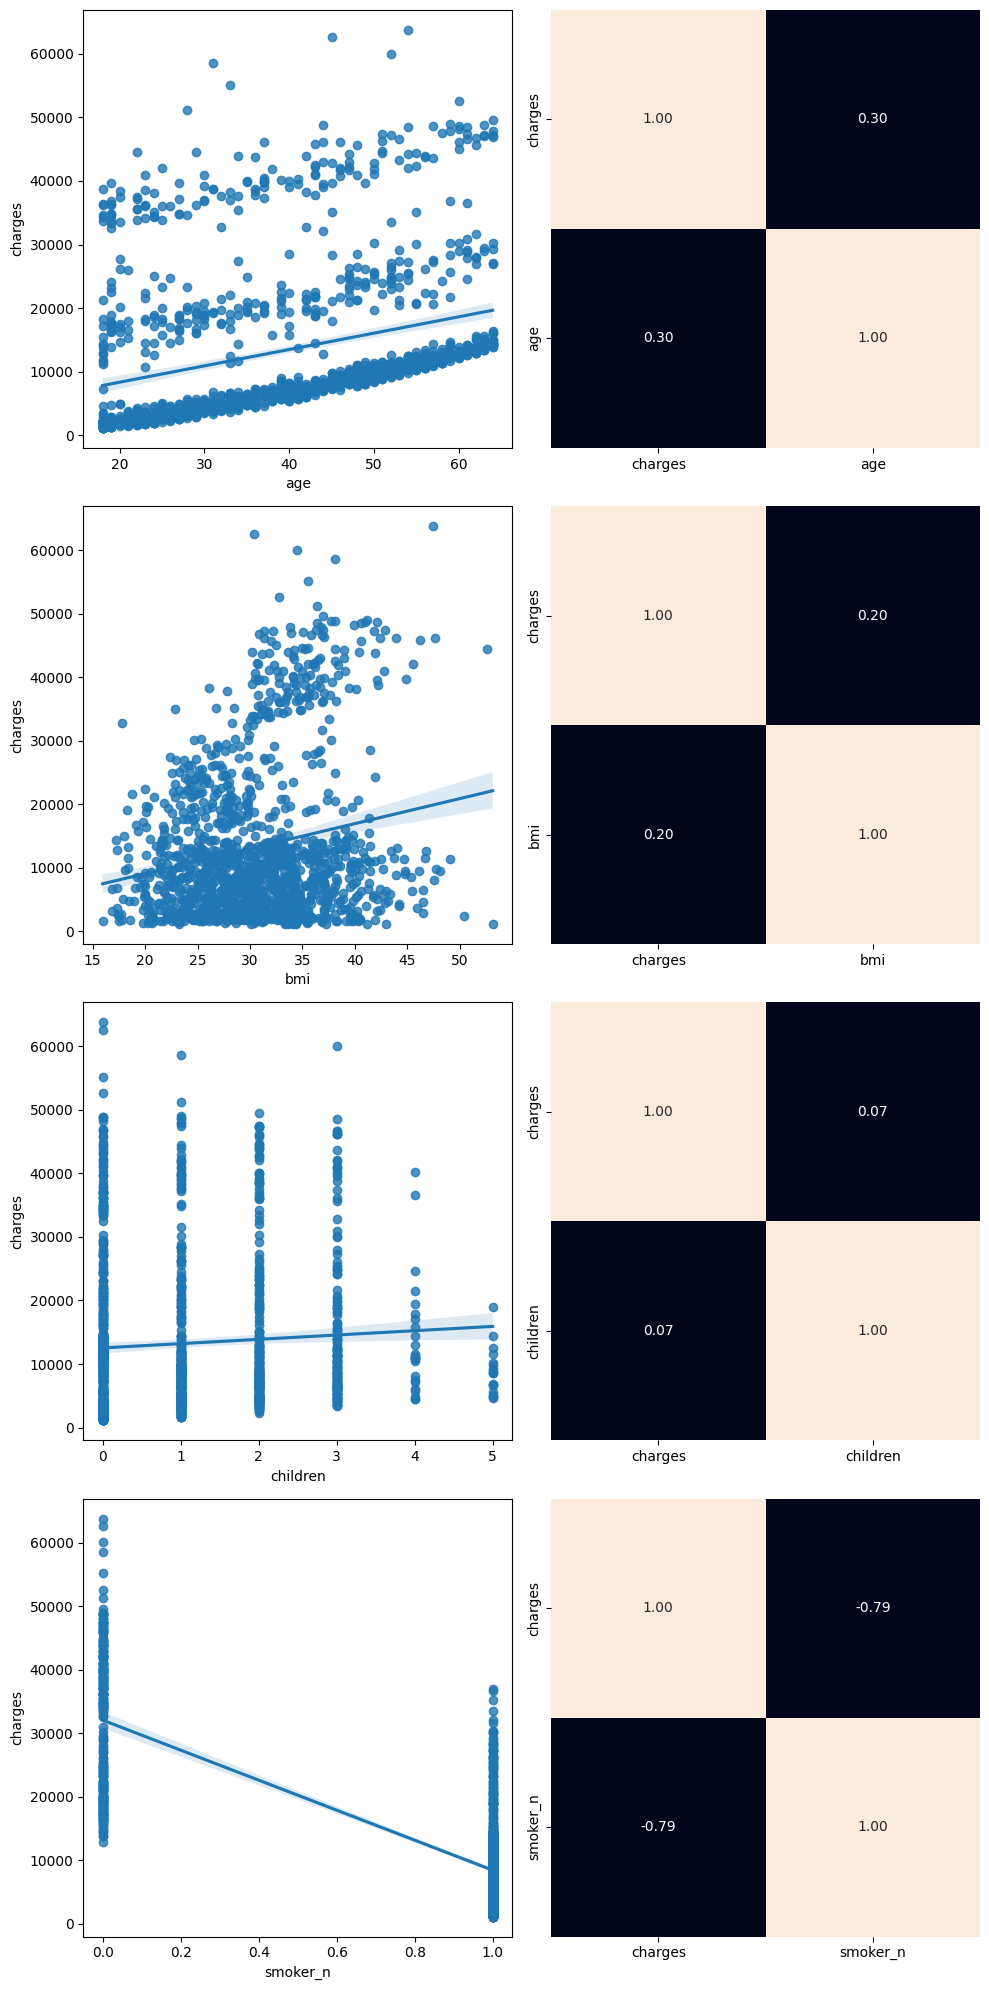

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
# Concatenar datos de entrenamiento y prueba para análisis
total_data = pd.concat([train_data, test_data], ignore_index=True)
 
# Crear gráficos de regresión y matrices de correlación
variables = ["age", "bmi", "children", "smoker_n"]  # Lista de variables a analizar
fig, axis = plt.subplots(len(variables), 2, figsize=(10, 5 * len(variables)))
 
for i, var in enumerate(variables):
   # Regresión entre la variable y 'charges'
   sns.regplot(data=total_data, x=var, y="charges", ax=axis[i, 0])
   # Matriz de correlación entre la variable y 'charges'
   sns.heatmap(total_data[["charges", var]].corr(), annot=True, fmt=".2f", ax=axis[i, 1], cbar=False)
 
# Ajustar la visualización
plt.tight_layout()
plt.show()


In [30]:
# Separar las características (X) y la variable objetivo (y) en los datos de entrenamiento y prueba
X_train = train_data.drop(["charges"], axis=1)  # Eliminar 'charges' del conjunto de características
y_train = train_data["charges"]  # Variable objetivo para entrenamiento
X_test = test_data.drop(["charges"], axis=1)  # Hacer lo mismo para el conjunto de prueba
y_test = test_data["charges"]  # Variable objetivo para prueba

In [31]:
from sklearn.linear_model import LinearRegression
 
# Crear el modelo de regresión lineal
model = LinearRegression()
 
# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)


LinearRegression()

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
 
# Mostrar el intercepto y los coeficientes del modelo de regresión lineal
print(f"Intercept (a): {model.intercept_}")  # Intercepto
print(f"Coefficients (b1, b2): {model.coef_}")  # Coeficientes

Intercept (a): 11830.316462846164
Coefficients (b1, b2): [   249.09521752    305.59649519    537.9633666     -85.02704092
 -23051.36812442]


In [33]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)
 
# Mostrar las predicciones
print("Predicted Charges:")
print(y_pred)

Predicted Charges:
[ 7780.09204548  5977.83338997 14215.82300956 31590.59473466
  9223.64922442 13438.43822409 29841.65667782  1685.03795715
 10919.46514725 11281.04050309 10418.78669104 33059.36084168
 30531.50988264 17420.0023959  10214.90616935  9749.75223135
  4298.47335596 32007.67725019  3488.96062241  5583.27330599
  3845.53703027 29815.02239719 15103.39914515 30646.34708594
 30908.30211535  5363.08477297 35705.172843   36714.56751572
 10928.83748576 13689.22034633  5994.25520485 13015.10761713
   842.10884744 12332.40611586 39769.78804625 12472.16793437
  4941.6340669   3962.34504306 31334.30270026  9347.27340131
  6423.31161511 29743.01929574 35062.57980736 11806.50755259
  7409.90515685  3638.00400509  5572.08908023  9165.34126485
  4217.22289854  9367.5521687   6914.22550367 11443.85328341
 30801.79761652  3861.35683277 11172.20169464 10108.79403925
 10412.98753451  2424.7972324  31428.46966997  9330.94873716
 15809.55411917  8489.70041893 12504.40317537  1161.34364986
 1700

In [34]:
# Calcular y mostrar el error cuadrático medio (MSE) y el R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

MSE: 35901914.11461986
R² Score: 0.8046218811772659
